In [766]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_context('paper')

In [3]:
with open(r'StreamingHistory0.json', encoding='utf-8') as f:
    data = json.load(f)
df = pd.DataFrame(data=data)

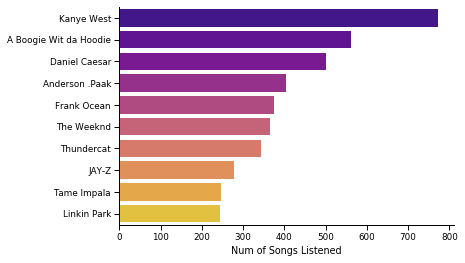

In [58]:
# SAVED WORK- completed charts
top10df # DataFrame showing artists and total song listens per artist
top10 = df['artistName'].value_counts().head(10)
top10df = top10.to_frame()
top10df.rename(columns={"artistName": "Num of Songs Listened"},inplace=True)
sns.barplot(x='Num of Songs Listened',y=top10df.index,data=top10df,palette='plasma')
sns.despine()

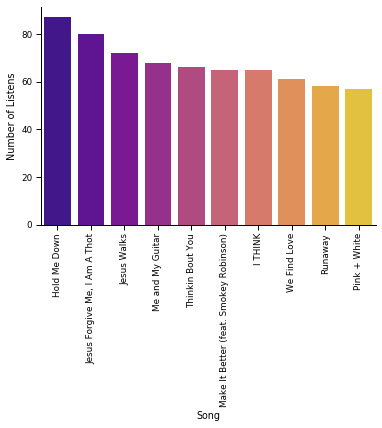

In [330]:
# SAVED WORK - continued - Top 10 Songs Listened To
tracks = df['trackName'].value_counts().head(10).to_frame()
tracks['Song'] = tracks.index
tracks.rename(columns={"trackName": "Number of Listens"},inplace=True)
g = sns.barplot(x='Song',y='Number of Listens',data=tracks, palette='plasma')
g.set_xticklabels(rotation=90, labels = tracks.index)
sns.despine()

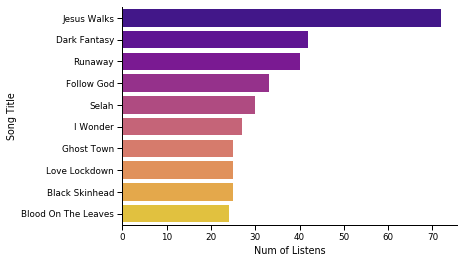

In [59]:
# SAVED WORK - Top 10 Kanye West Songs Listened To
westtracks = df[df['artistName']=='Kanye West']['trackName'].to_frame()
west10 =  westtracks['trackName'].value_counts().head(10).to_frame()
west10['Song Title'] = west10.index
west10.rename(columns={"trackName": "Num of Listens"},inplace=True)
sns.barplot(x='Num of Listens',y='Song Title',data=west10,palette = 'plasma')
sns.despine()

In [760]:
# Getting dates DataFrame
dates = df['endTime'].apply(lambda x: x.split(' ',1)[-2]).value_counts().sort_index().to_frame()

# Add day column
dates['Day'] = dates.index 

# Add Year column
dates['Year'] = dates['Day'].apply(lambda x: x.split('-')[0]).sort_index() 

# Add month column
import re
S = dates['Day']
months = [itm[0] for itm in S.str.findall('-..-') if len(itm)>0]
dates['Months'] = months

# Renaming endTimes column
dates.rename(columns={"endTime": "Number of Songs Listened To"},inplace=True)

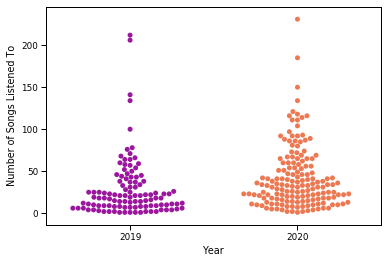

In [315]:
# SAVED WORK - continued - Yearly Song Breakdown
dates
sns.swarmplot(x='Year', y='Number of Songs Listened To', data=dates, palette='plasma')

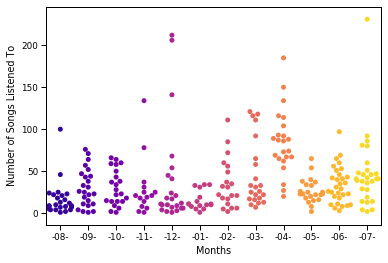

In [313]:
# SAVED WORK - continued - Monthly Song Breakdown Aug 2019 - July 2020
dates
sns.swarmplot(x='Months', y='Number of Songs Listened To', data=dates, palette='plasma')

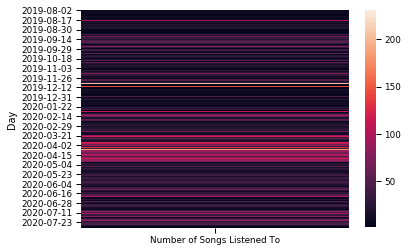

In [312]:
# SAVED WORK - heatmap of daily song listens from Aug 2019 - July 2020
sns.heatmap(dates.pivot_table(values='Number of Songs Listened To',index='Day'))

(0, 23)

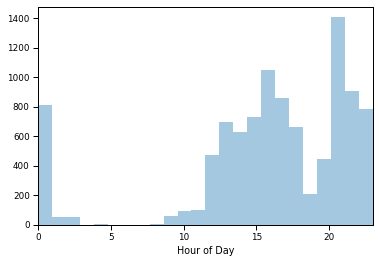

In [765]:
# SAVED WORK - when I listen during the day
times['For Real'] = pd.to_datetime(df['endTime'])
st = times['For Real'].dt.tz_localize('UTC')
times['Final'] = st.dt.tz_convert('US/Eastern')
times['Hour of Day'] = times['Final'].map(lambda x: str(x)[11:-12])
sns.distplot(times['Hour of Day'],bins=24,kde=False).set_xlim(0,23)

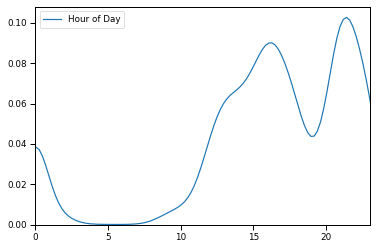

In [758]:
# SAVED WORK - continued
g = sns.kdeplot(times['Hour of Day']).set_xlim(0,23)